<a href="https://colab.research.google.com/github/chanhee-kang/Data-Analysis-UCI-dataset-OnlineNewsPopulality/blob/master/predicting_0nlineNews_UCI_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment1 - Advanced  Data Analysis

---

**Problem**: The task of the assignment is to build a multivariate linear model for predicting the popularity of online news, which is to predict the number of shares for the article.<br>
**Name**: Chanhee Kang (2019711601)

# Download Libraries for predicting online news dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
from time import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Download datasets, and the datasets is Online News Dataset from UCI
http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [2]:
# Load the dataset 'OnlineNewsPopularityDataset.csv'
data = pd.read_csv('/content/sample_data/OnlineNewsPopularityDataset.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Data Exploration


---

Descriptive statistics of all features “Predictors”<br>
Features correlation (with any visualization, if possible).

In [3]:
#check the information of the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  int64  
 2    n_tokens_title                 39644 non-null  int64  
 3    n_tokens_content               39644 non-null  int64  
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  int64  
 8    num_self_hrefs                 39644 non-null  int64  
 9    num_imgs                       39644 non-null  int64  
 10   num_videos                     39644 non-null  int64  
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

<function matplotlib.pyplot.show>

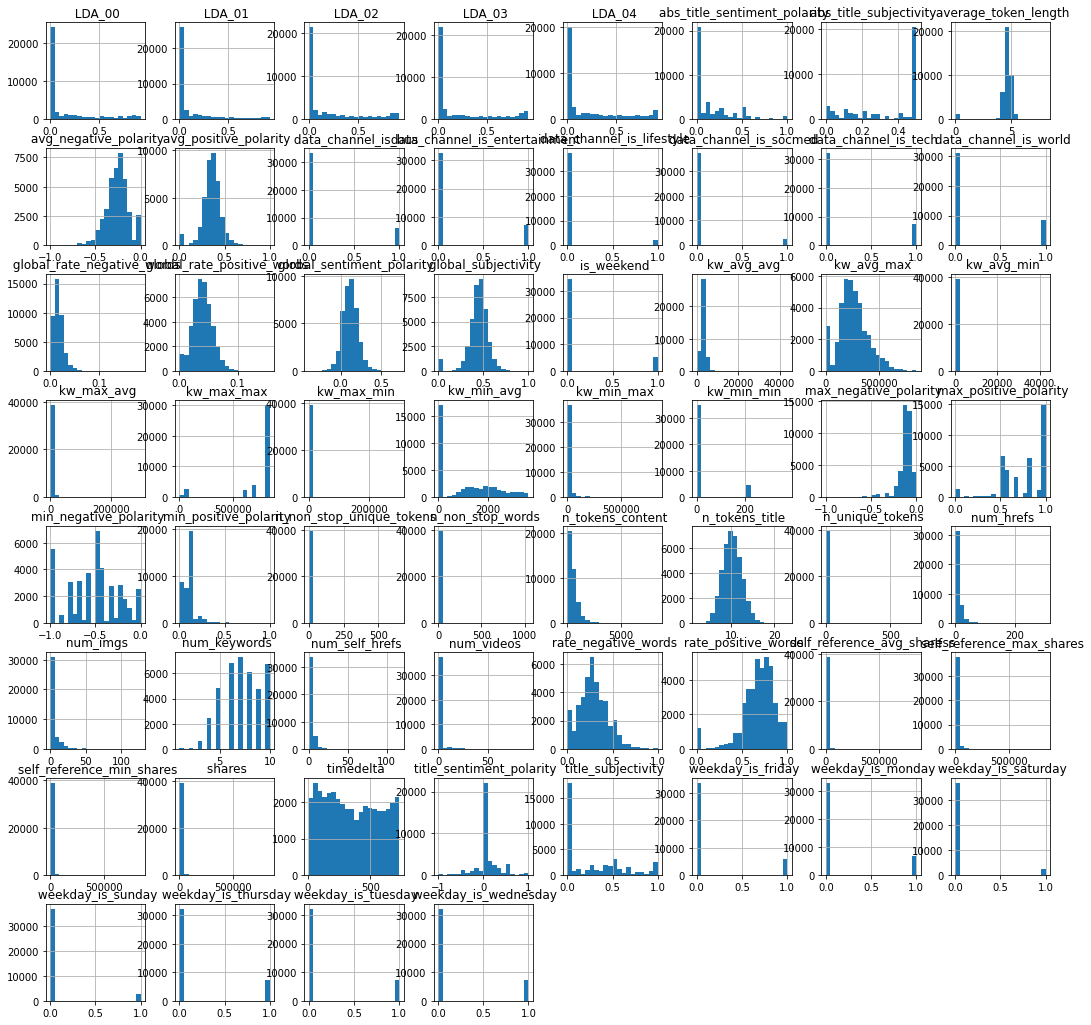

In [5]:
# check histogram of the datasets
data.hist(bins = 20, figsize = (18, 18))
plt.show

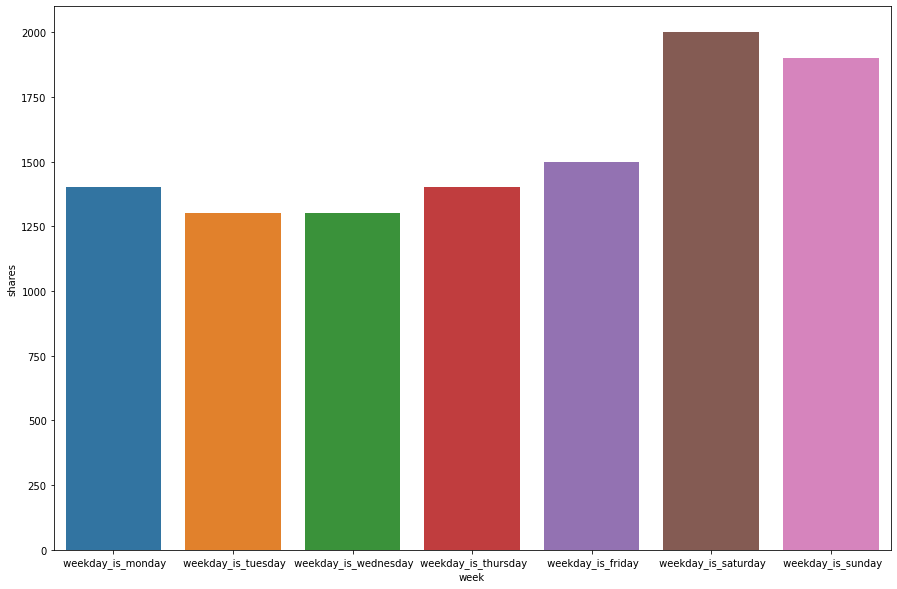

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

shares = []
cols = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday']
for x in cols:
    shares.append(data[data[x] == 1][' shares'].median())

days = sns.barplot(x = cols, y = shares)
days.set(xlabel = 'week', ylabel = 'shares')
plt.show()

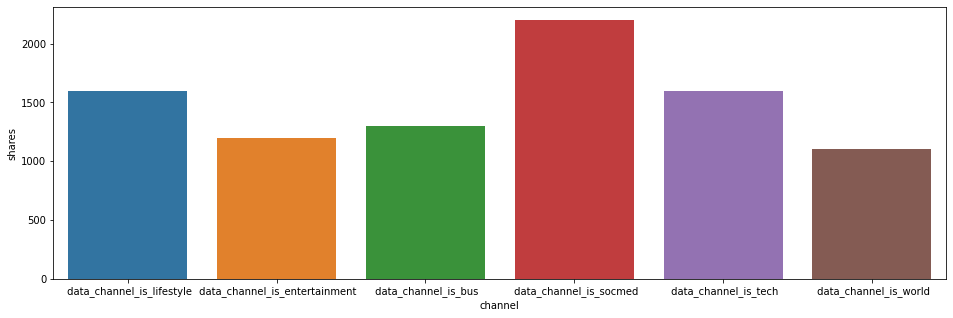

In [0]:
channel = []
cols = [' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']
for d in cols:
    channel.append(data[data[d]==1][' shares'].median())

cchanel = sns.barplot(x = cols, y = channel)
cchanel.set(xlabel = 'channel', ylabel = 'shares')
plt.show()

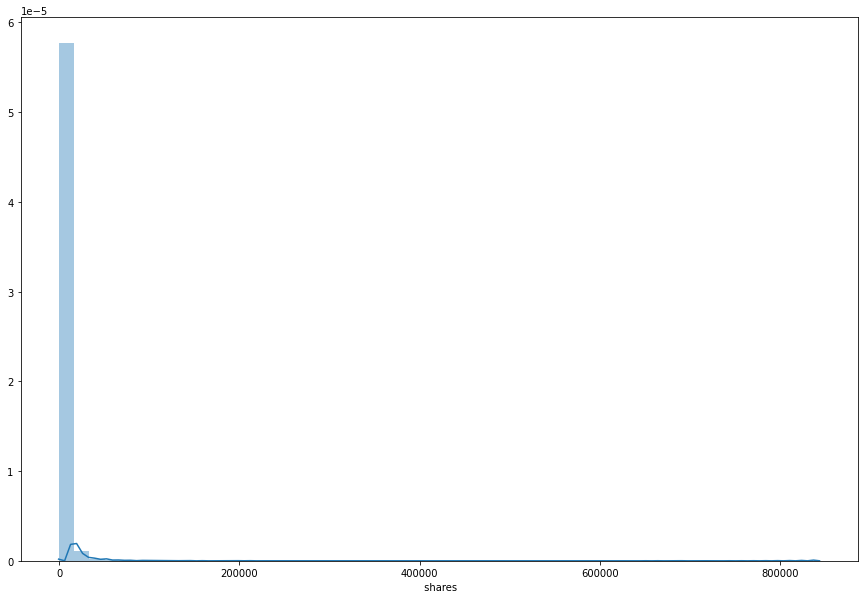

In [14]:
sns.distplot(data[' shares'])
plt.show()

In [15]:
ddata = data[data[' shares']<26647]
ddata.shape

(39130, 61)

# Building a Regression Model


---



In [0]:
train_set, test_set = train_test_split(ddata, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['url',' shares'], axis=1) #Dropping both 'shares', the predicted variable and 'url', a text variable
y_train_set = train_set[' shares']

X_test_set = test_set.drop(['url',' shares'], axis=1)
y_test_set = test_set[' shares']

# Model1: Liner regression model

**Creating a liner regression model**

In [21]:
#liner regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
print("Predicted shares:", lin_reg.predict(some_X_data))
print("Actual shares:", list(some_y_data))

Predicted shares: [2242.96868924 1815.35622978 2756.11209231 1944.87257543 1767.35032252
 1681.49060818 2775.27490019 1649.50855844 2978.78656721 2355.12535719
 1208.66629749 4244.68546605 2480.08965958 2059.81841627 4360.7498679
 3270.56661269 1920.67727789 1895.11160546 4741.1559679  3461.73332489
 2782.02155463 1908.40411188 2027.34664694 1278.61064334 1272.3662652
 3283.90046028 2201.07607363 2514.34794182 4354.2364598  2513.73871365
 1798.72915987 1538.76432934 3786.17007473 2973.31173302 3612.31807773
 1787.91646552 2903.31676413 2111.40498344 3616.90879152 3618.39894254
 2654.01445181 3109.94464337 2142.32393427 2797.17580368 2348.1419395
 2030.82826163 2332.97804093 3324.97959088 2597.90484461 1558.96197557
 2964.15849257 1966.85691473 4036.41185098 3249.23730804 2455.08044502
 4090.96656974 2299.54563179 2725.65340747 2645.26779122 2007.58278506
 2107.28449476 2462.95621868 3745.87900014 1991.85287465 2092.16289588
 2188.74767783 2236.29790462 2878.22354045 3121.89704841 4248.

In [23]:
df_sdata = pd.DataFrame(lin_reg.predict(some_X_data),list(some_y_data) )
df_sdata.reset_index(level=0, inplace=True)
df_ssdata = df_sdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_ssdata.head()

,Actual shares,Predicted shares
0,1600,2242.968689
1,1100,1815.356230
2,904,2756.112092
3,2500,1944.872575
4,981,1767.350323


AttributeError: ignored

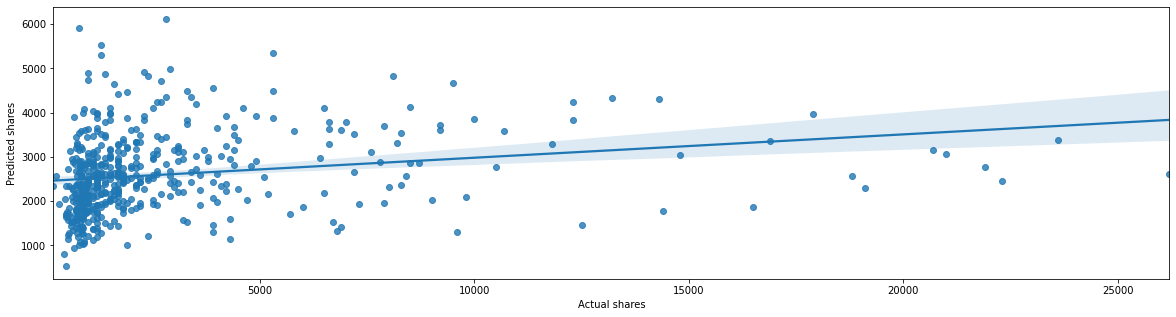

In [26]:
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_ssdata["Actual shares"], y=df_ssdata["Predicted shares"])
sns.plt.show()

**Check the MSE, RMSE, amd MAE of the liner regression model**

In [29]:
share_predictions = lin_reg.predict(X_train_set)
lin_mse = mean_squared_error(y_train_set, share_predictions)
print(lin_mse)

10709394.94218467


In [28]:
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

3272.521190486728

In [30]:
lin_mae = mean_absolute_error(y_train_set, share_predictions)
print(lin_mae)

1902.580613009672


**Check crose validation of the liner regression model**

In [0]:
def display(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [43]:
lin_scores = cross_val_score(lin_reg, X_train_set, y_train_set,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores)

[3.28657786e+03 3.31672165e+03 3.30074939e+03 3.39138239e+03
 3.35556725e+03 3.21619285e+03 1.52685115e+08 3.22406327e+03
 3.22074112e+03 2.97523405e+03]


In [44]:
display(lin_rmse_scores)

Scores: [3.28657786e+03 3.31672165e+03 3.30074939e+03 3.39138239e+03
 3.35556725e+03 3.21619285e+03 1.52685115e+08 3.22406327e+03
 3.22074112e+03 2.97523405e+03]
Mean: 15271440.207779443
Standard deviation: 45804558.213517115


# Model 2: Decision Tree Model

In [34]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_set, y_train_set)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [35]:
x_data = X_train_set.iloc[:5]
y_data = y_train_set.iloc[:5]
print("Predicted shares:", tree_reg.predict(x_data))
print("Actual shares:", list(y_data))

Predicted shares: [1600. 1100.  904. 2500.  981.]
Actual shares: [1600, 1100, 904, 2500, 981]


**Check the MSE, RMSE, MAE of the Decision Tree Model**

In [36]:
share_predictions = tree_reg.predict(X_train_set)
tree_mse = mean_squared_error(y_train_set, share_predictions)
print(tree_mse)

0.0


In [37]:
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [38]:
tree_mae = mean_absolute_error(y_train_set, share_predictions)
print(tree_mae)

0.0


**Check the cross validation of the Decision Tree Model**

In [0]:
scores = cross_val_score(tree_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [45]:
display(tree_rmse_scores)

Scores: [4894.08161853 4868.66108502 4744.01983937 5006.49957715 4832.42845059
 4821.22731107 5063.71719475 4753.62527132 4835.56934752 4728.34640012]
Mean: 4854.817609543946
Standard deviation: 104.3507740248269


In [46]:
df_tdata = pd.DataFrame(tree_reg.predict(x_data),list(y_data) )
df_tdata.reset_index(level=0, inplace=True)
df_ttdata = df_tdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_ttdata.head()

,Actual shares,Predicted shares
0,1600,1600.0
1,1100,1100.0
2,904,904.0
3,2500,2500.0
4,981,981.0


AttributeError: ignored

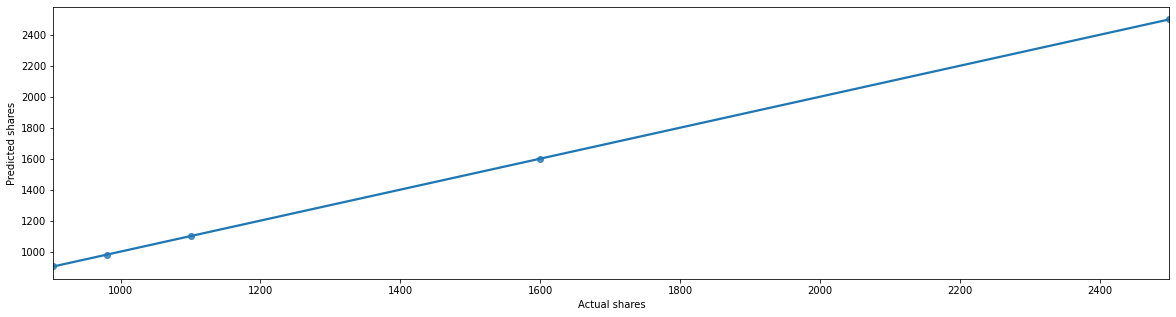

In [48]:
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_ttdata["Actual shares"], y=df_ttdata["Predicted shares"])
sns.plt.show()

# Model Compare with ADOVA

In [0]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

**Decision Tree ADOVA**

In [55]:
df_ttdata.head()

,Actual shares,Predicted shares
0,1600,1600.0
1,1100,1100.0
2,904,904.0
3,2500,2500.0
4,981,981.0


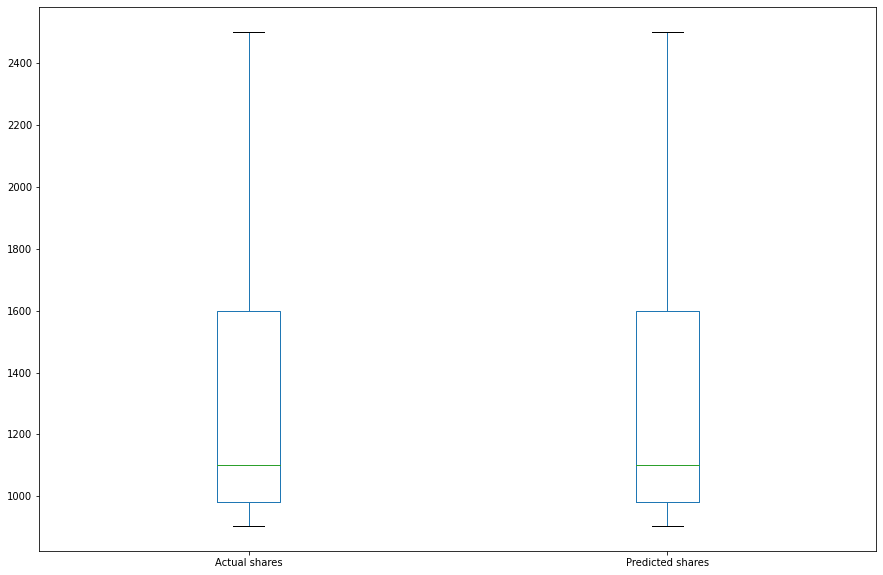

In [69]:
df_ttdata.boxplot(column=['Actual shares', 'Predicted shares'], grid=False)

In [70]:
fvalue, pvalue = stats.f_oneway(df_ttdata['Actual shares'], df_ttdata['Predicted shares'])
print(fvalue, pvalue)

0.0 1.0


In [71]:
import statsmodels.api as sm
adv_m = pd.melt(df_ttdata.reset_index(), id_vars=['index'], value_vars=['Actual shares', 'Predicted shares'])
adv_m.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=adv_m).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.0,1.0,0.0,1.0
Residual,3520264.0,8.0,NaN,NaN


**Liner Regression with ADOVA**

In [72]:
df_ssdata.head()

,Actual shares,Predicted shares
0,1600,2242.968689
1,1100,1815.356230
2,904,2756.112092
3,2500,1944.872575
4,981,1767.350323


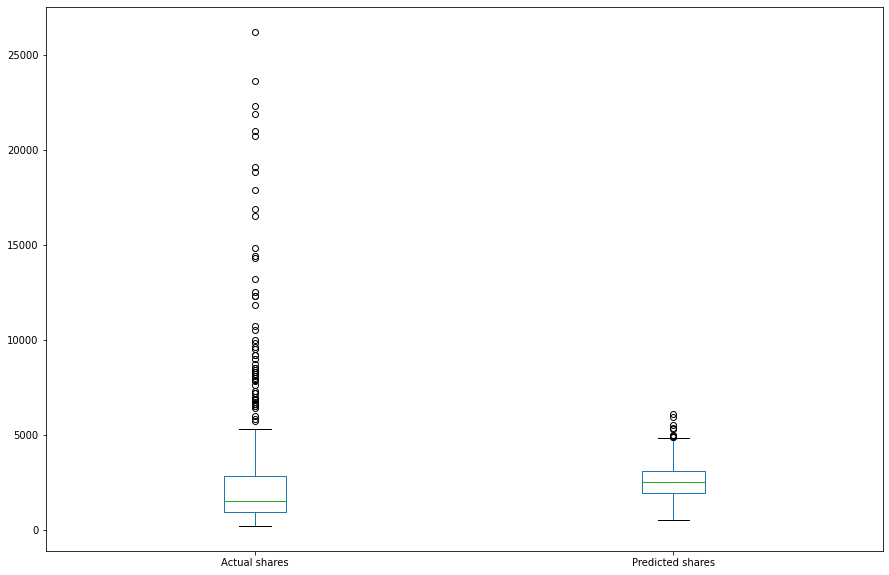

In [73]:
df_ssdata.boxplot(column=['Actual shares', 'Predicted shares'], grid=False)

In [74]:
fvalue, pvalue = stats.f_oneway(df_ssdata['Actual shares'], df_ssdata['Predicted shares'])
print(fvalue, pvalue)

0.91722285633064 0.3384371607563912


In [75]:
import statsmodels.api as sm
adv_r = pd.melt(df_ssdata.reset_index(), id_vars=['index'], value_vars=['Actual shares', 'Predicted shares'])
adv_r.columns = ['index', 'treatments', 'value']
model2 = ols('value ~ C(treatments)', data=adv_r).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(treatments),6.371656e+06,1.0,0.917223,0.338437
Residual,6.932790e+09,998.0,NaN,NaN
